<a href="https://colab.research.google.com/github/bhargavi0401/Emotion-Detection/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.kill(os.getpid(), 9)

In [1]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.8 MB/s eta 0:00:00


In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import resampy

In [2]:
from keras import regularizers

In [3]:
import os

In [4]:
mylist= os.listdir('/content/drive/MyDrive/Audio_Speech_Data')

In [5]:
type(mylist)

list

In [6]:
print(mylist[1439])

03-01-05-02-02-01-08.wav


In [7]:
print(mylist[400][6:-16])

08


Plotting the audio file's waveform and its spectrogram

In [8]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/Audio_Speech_Data/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


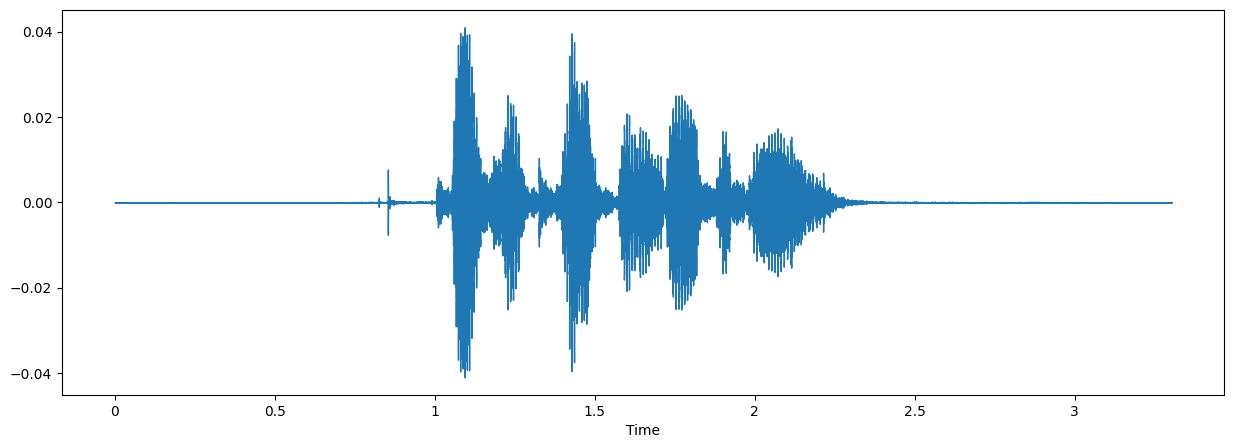

In [9]:
%pylab inline
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

<ipython-input-10-c7644e926afe>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('/content/drive/MyDrive/Audio_Speech_Data/03-01-01-01-01-01-01.wav')
<ipython-input-10-c7644e926afe>:26: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


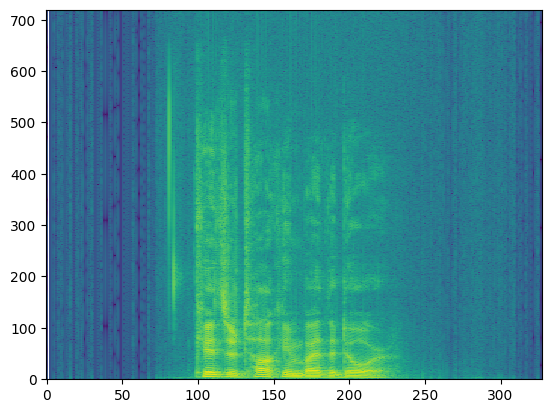

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('/content/drive/MyDrive/Audio_Speech_Data/03-01-01-01-01-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [11]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')

In [12]:
labels = pd.DataFrame(feeling_list)

In [13]:
labels[:10]

,0
0,female_happy
1,female_sad
2,female_angry
3,female_angry
4,female_sad
5,female_angry
6,female_happy
7,female_happy
8,female_sad
9,female_sad


Getting the features of audio files using librosa

In [14]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08':
        X, sample_rate = librosa.load('/content/drive/MyDrive/Audio_Speech_Data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,
                                            sr=sample_rate,
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1


In [15]:
df[:5]

,feature
0,"[-53.479824, -53.71778, -55.004333, -54.965492..."
1,"[-52.44743, -51.723022, -51.810726, -50.846558..."
2,"[-52.081318, -49.050755, -48.865818, -49.20798..."
3,"[-46.73236, -49.312744, -49.537437, -49.16542,..."
4,"[-56.155685, -53.55643, -54.67472, -55.003654,..."


In [16]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [17]:
newdf = pd.concat([df3,labels], axis=1)

In [18]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [19]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-53.479824,-53.717781,-55.004333,-54.965492,-54.323532,-55.139442,-51.769375,-51.738560,-51.537983,-50.650997,...,-40.021450,-39.736153,-40.806484,-42.065731,-41.077335,-40.920578,-43.015312,-44.794868,-43.672207,female_happy
1,-52.447430,-51.723022,-51.810726,-50.846558,-52.181194,-50.953224,-51.929276,-50.069237,-51.064274,-51.178951,...,-52.454582,-53.226955,-51.588608,-48.858482,-49.559772,-49.241795,-49.746216,-51.040016,-50.889091,female_sad
2,-52.081318,-49.050755,-48.865818,-49.207981,-50.145027,-48.545757,-49.289555,-50.947186,-50.168785,-50.172829,...,-44.673092,-49.169254,-48.626530,-49.493160,-49.117043,-48.921585,-46.197422,-45.787796,-49.164509,female_angry
3,-46.732361,-49.312744,-49.537437,-49.165421,-49.961143,-49.895359,-50.056770,-47.998741,-49.212368,-51.043392,...,-51.971897,-51.041733,-49.913731,-51.230835,-52.506657,-50.665615,-49.479832,-50.189903,-51.853901,female_angry
4,-56.155685,-53.556431,-54.674721,-55.003654,-54.083061,-53.164509,-52.789299,-53.055996,-53.992859,-57.787231,...,-39.149193,-39.213936,-36.982124,-36.559433,-37.286129,-38.087120,-39.468254,-38.988491,-40.887253,female_sad


In [20]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
873,-52.531181,-51.499580,-49.453140,-47.018715,-42.053650,-38.240196,-36.809055,-36.117943,-36.283695,-36.364162,...,-51.343723,-50.904533,-49.775856,-49.438210,-49.257542,-49.062935,-48.619568,-46.129642,-44.033840,female_sad
33,-43.217976,-41.917503,-39.584999,-38.758408,-38.953312,-40.042603,-40.950436,-40.641911,-41.341099,-42.488224,...,-45.526447,-47.148628,-46.475239,-44.839561,-46.956902,-47.138676,-48.784573,-46.864761,-46.239544,male_happy
294,-46.827995,-45.938923,-46.842491,-46.738319,-47.368942,-46.496952,-46.563755,-45.952732,-46.697151,-47.240314,...,-41.095547,-40.880344,-39.829044,-39.385719,-38.904789,-39.741951,-41.177708,-37.625313,-31.721897,male_fearful
614,-59.178398,-59.178398,-59.178398,-59.164822,-58.261196,-57.036289,-57.798504,-58.676933,-59.178398,-59.178398,...,-59.178398,-59.178398,-59.178398,-59.178398,-59.178398,-59.178398,-59.178398,-59.178398,-59.178398,male_fearful
576,-50.729416,-50.489868,-49.918930,-48.726536,-48.062527,-48.082134,-48.516563,-48.754421,-48.152256,-47.254620,...,-50.402973,-50.335434,-50.331821,-50.311295,-49.818916,-49.209488,-49.944717,-50.493858,-50.476658,female_fearful
178,-48.413609,-48.076077,-47.574562,-47.451920,-48.136116,-48.706993,-48.955776,-48.112648,-46.947609,-46.736580,...,-34.216301,-33.903442,-33.969997,-36.094124,-36.618526,-36.468445,-37.396561,-36.536045,-32.044113,female_happy
49,-72.367828,-71.142014,-66.279625,-62.663773,-64.825958,-71.925858,-68.970261,-69.371025,-71.914337,-69.519646,...,-59.058388,-55.989418,-57.581802,-56.955223,-54.964931,-58.057285,-57.142620,-55.409016,-57.129986,male_fearful
919,-66.081367,-66.081367,-65.549118,-65.019135,-65.384933,-65.084061,-64.957115,-61.352924,-61.121456,-62.187599,...,-48.056950,-47.372578,-48.899174,-48.729977,-48.320133,-50.189968,-49.495121,-51.311234,-51.691948,male_happy
654,-55.297035,-55.297035,-55.297035,-55.322456,-55.297035,-55.297035,-55.335472,-55.320236,-55.297035,-55.297035,...,-32.187546,-32.081905,-37.891525,-40.392437,-40.876827,-41.834858,-43.872276,-34.632458,-25.431044,female_sad
428,-46.964298,-49.666805,-53.323410,-53.682289,-53.738369,-52.724144,-51.939064,-51.224201,-52.601494,-52.438293,...,-28.126060,-28.802042,-28.739342,-28.627665,-29.072733,-29.154388,-29.548170,-29.782362,-29.263554,male_calm


In [21]:
rnewdf=rnewdf.fillna(0)

Dividing the data into test and train

In [22]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [23]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
722,-63.937290,-63.937290,-63.937290,-63.937290,-63.937290,-63.937290,-63.937290,-63.937290,-63.937290,-63.937290,...,-60.818851,-63.304806,-63.160236,-60.990486,-60.701736,-59.201130,-57.127384,-58.716892,-63.848488,female_sad
264,-54.740135,-55.849663,-57.078987,-56.740311,-56.328194,-54.951927,-56.146683,-57.529514,-57.926270,-55.627018,...,-39.522579,-41.310505,-43.606461,-45.284012,-45.988152,-47.077557,-45.722908,-46.303017,-43.644249,male_calm
714,-63.403019,-63.947083,-63.355434,-63.285995,-63.245968,-62.802666,-62.743549,-62.665329,-62.665329,-62.665329,...,-53.914436,-52.146305,-52.200443,-52.263699,-53.177605,-53.587875,-54.778988,-55.145081,-55.282082,female_sad
134,-52.348656,-51.636501,-52.250465,-52.348656,-51.138523,-50.790157,-50.324368,-48.709213,-50.398674,-50.990425,...,-51.498878,-51.120422,-52.060642,-51.560349,-50.819538,-49.372002,-49.712589,-50.936794,-50.387039,male_fearful
418,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,...,-39.483696,-39.880711,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,-39.981602,female_angry
899,-41.033264,-39.490849,-39.934807,-39.509590,-40.693314,-40.119595,-40.160099,-41.144978,-42.636742,-42.084877,...,-37.529579,-36.612724,-36.407249,-36.786503,-38.316772,-39.494022,-40.084206,-40.963364,-40.844604,female_fearful
73,-51.461758,-47.535915,-46.926292,-48.825657,-50.618183,-48.991127,-48.280418,-49.367855,-48.451229,-47.929562,...,-46.818886,-46.326908,-45.161842,-47.336567,-48.391350,-48.770584,-49.710373,-48.178261,-51.010826,female_calm
611,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,...,-43.588032,-42.803501,-42.723484,-43.573750,-44.581154,-45.079384,-43.456455,-42.601650,-42.604046,male_angry
764,-49.744549,-46.855469,-47.236748,-48.487263,-48.078884,-47.657558,-48.304619,-48.670662,-49.700989,-51.626732,...,-36.768600,-36.885239,-37.735126,-38.833351,-41.131760,-41.172646,-43.699280,-45.820950,-46.887486,male_sad
656,-51.664413,-51.664413,-51.664413,-51.664413,-51.664413,-51.664413,-51.664413,-51.664413,-51.664413,-51.664413,...,-33.885860,-36.851635,-34.648804,-32.718925,-32.716297,-31.840088,-32.045387,-30.356739,-27.354042,female_angry


In [24]:
trainfeatures = train.iloc[:, :-1]

In [25]:
trainlabel = train.iloc[:, -1:]

In [26]:
testfeatures = test.iloc[:, :-1]

In [27]:
testlabel = test.iloc[:, -1:]

In [28]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
X_train.shape

(757, 216)

Changing dimension for CNN model

In [31]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [32]:
from tensorflow.keras.optimizers import RMSprop
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          1536      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_1 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout (Dropout)           (None, 216, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 27, 128)           0         
 D)                                                              
                                                        

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Removed the whole training part for avoiding unnecessary long epochs list

In [35]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
48/48 [==============================] - 8s 140ms/step - loss: 2.3956 - accuracy: 0.0727 - val_loss: 2.2762 - val_accuracy: 0.1084
Epoch 2/700
48/48 [==============================] - 5s 113ms/step - loss: 2.2851 - accuracy: 0.1176 - val_loss: 2.2433 - val_accuracy: 0.1527
Epoch 3/700
48/48 [==============================] - 7s 148ms/step - loss: 2.2560 - accuracy: 0.1480 - val_loss: 2.2336 - val_accuracy: 0.1675
Epoch 4/700
48/48 [==============================] - 5s 106ms/step - loss: 2.2264 - accuracy: 0.1585 - val_loss: 2.2082 - val_accuracy: 0.1921
Epoch 5/700
48/48 [==============================] - 6s 115ms/step - loss: 2.1988 - accuracy: 0.1691 - val_loss: 2.2099 - val_accuracy: 0.2020
Epoch 6/700
48/48 [==============================] - 7s 137ms/step - loss: 2.1871 - accuracy: 0.1836 - val_loss: 2.1680 - val_accuracy: 0.1921
Epoch 7/700
48/48 [==============================] - 5s 109ms/step - loss: 2.1637 - accuracy: 0.2206 - val_loss: 2.1585 - val_accuracy: 0.1626

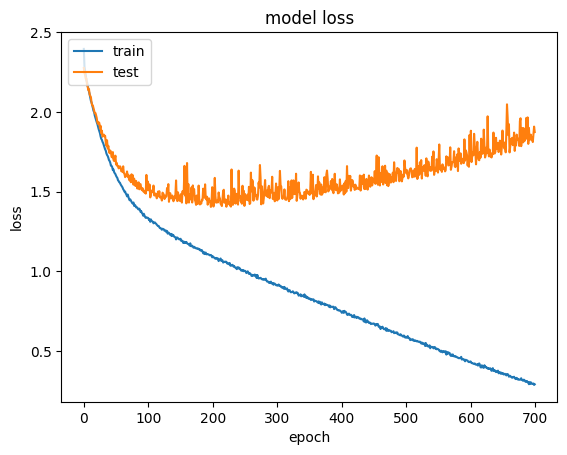

In [36]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Loading the Model

In [43]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 47.29%


In [40]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

7/7 [==============================] - 1s 79ms/step


In [41]:
preds

array([[3.21899352e-05, 1.22004625e-04, 8.87280805e-07, ...,
        1.41411135e-02, 3.59763354e-02, 1.74459312e-02],
       [5.58918118e-02, 4.73563224e-01, 4.02350456e-01, ...,
        1.83334196e-05, 3.77103675e-07, 2.50292328e-06],
       [2.59461164e-01, 2.57116772e-04, 4.15754272e-04, ...,
        6.00203406e-04, 1.76032132e-03, 4.56027301e-05],
       ...,
       [8.29829787e-07, 1.08742214e-12, 1.41700796e-09, ...,
        2.37410728e-04, 5.87181275e-05, 1.56642443e-06],
       [2.28753183e-02, 2.42290917e-05, 1.21595761e-07, ...,
        3.08092264e-03, 1.66532218e-01, 4.94484231e-03],
       [2.27677589e-03, 8.28147531e-01, 7.96939433e-02, ...,
        2.70650256e-04, 8.43692746e-04, 8.04047449e-04]], dtype=float32)

In [44]:
preds1=preds.argmax(axis=1)

In [45]:
preds1

array([6, 1, 3, 0, 0, 6, 2, 3, 9, 1, 6, 6, 8, 0, 7, 2, 3, 5, 5, 4, 9, 6,
       2, 6, 2, 9, 4, 2, 6, 5, 6, 7, 7, 5, 8, 6, 2, 8, 3, 3, 2, 9, 2, 5,
       5, 0, 7, 8, 4, 6, 0, 2, 5, 8, 8, 9, 6, 1, 7, 6, 6, 8, 5, 6, 9, 2,
       6, 6, 6, 3, 8, 5, 6, 9, 1, 5, 6, 2, 4, 7, 2, 1, 2, 4, 3, 3, 5, 8,
       7, 7, 1, 6, 2, 3, 8, 7, 4, 4, 7, 8, 6, 3, 7, 4, 9, 8, 1, 0, 9, 3,
       5, 2, 5, 3, 8, 5, 2, 1, 6, 8, 2, 5, 0, 4, 2, 4, 8, 2, 6, 6, 6, 5,
       2, 9, 3, 8, 9, 2, 2, 8, 7, 8, 3, 5, 9, 8, 1, 5, 6, 2, 1, 6, 5, 5,
       5, 7, 9, 3, 5, 2, 3, 4, 5, 2, 3, 4, 7, 6, 2, 4, 0, 1, 0, 4, 2, 6,
       2, 8, 6, 3, 3, 8, 5, 5, 1, 3, 1, 5, 7, 4, 3, 9, 4, 4, 0, 4, 2, 6,
       6, 1, 5, 6, 1])

In [46]:
abc = preds1.astype(int).flatten()

In [47]:
predictions = (lb.inverse_transform((abc)))

In [48]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_calm
1,female_calm
2,female_happy
3,female_angry
4,female_angry
5,male_calm
6,female_fearful
7,female_happy
8,male_sad
9,female_calm


In [49]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [50]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_happy
1,female_sad
2,female_angry
3,female_happy
4,female_angry
5,male_fearful
6,female_fearful
7,female_angry
8,male_sad
9,female_sad


In [51]:
finaldf = actualdf.join(preddf)

In [52]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_angry,female_angry
171,female_calm,female_calm
172,female_happy,female_angry
173,female_fearful,female_sad
174,female_sad,female_fearful
175,male_fearful,male_calm
176,female_calm,female_fearful
177,male_angry,male_happy
178,male_fearful,male_calm
179,female_happy,female_happy


In [53]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,19
female_calm,19
female_fearful,21
female_happy,21
female_sad,20
male_angry,25
male_calm,22
male_fearful,18
male_happy,20


In [54]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,10
female_calm,15
female_fearful,29
female_happy,21
female_sad,18
male_angry,27
male_calm,33
male_fearful,15
male_happy,21


In [55]:
finaldf.to_csv('Predictions.csv', index=False)